In [1]:
import jax.numpy as jnp
from jax import random, jit, vmap, grad, jacfwd, jacrev, hessian, value_and_grad
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Define the function to be approximated

def f(x):
    return jnp.sin(x)


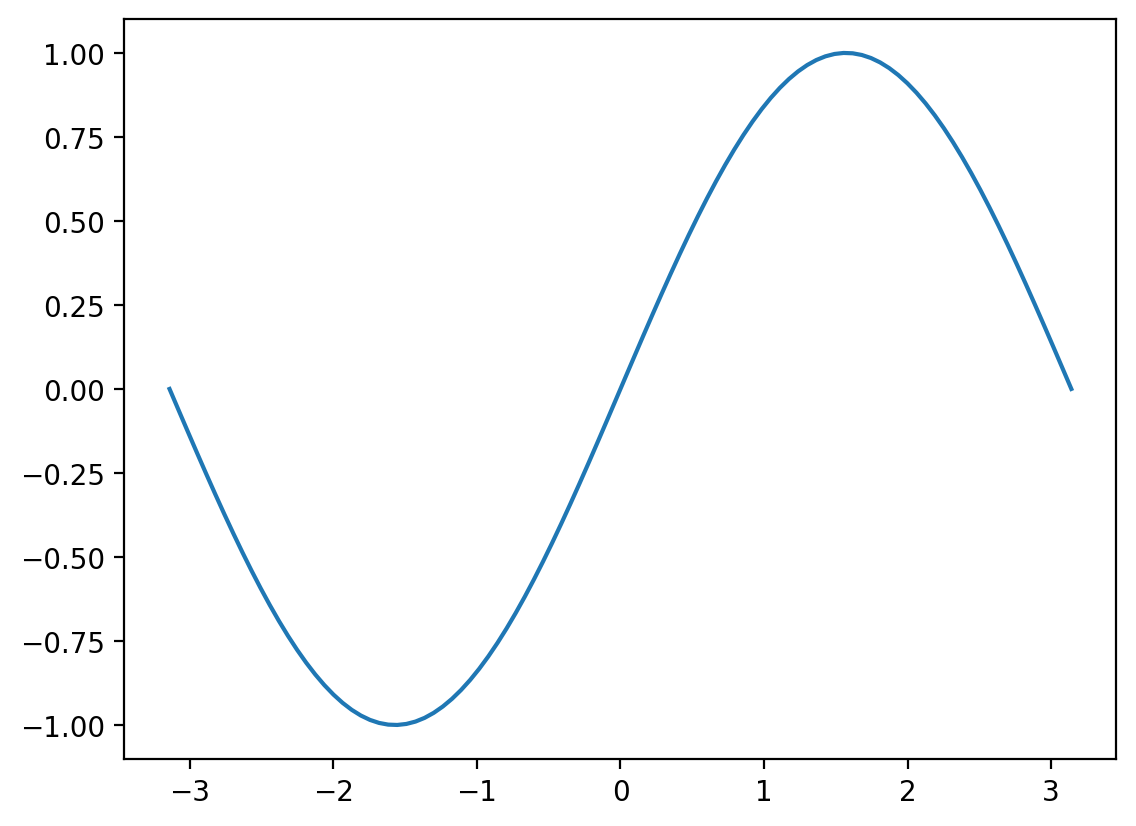

In [3]:
# Plot the function

x = jnp.linspace(-jnp.pi, jnp.pi, 100)
plt.plot(x, f(x))


In [5]:
# First order Taylor approximation for f(x) at x = 0

def taylor1(f, x, x0=0.):
    return f(x0) + grad(f)(x0) * (x - x0)


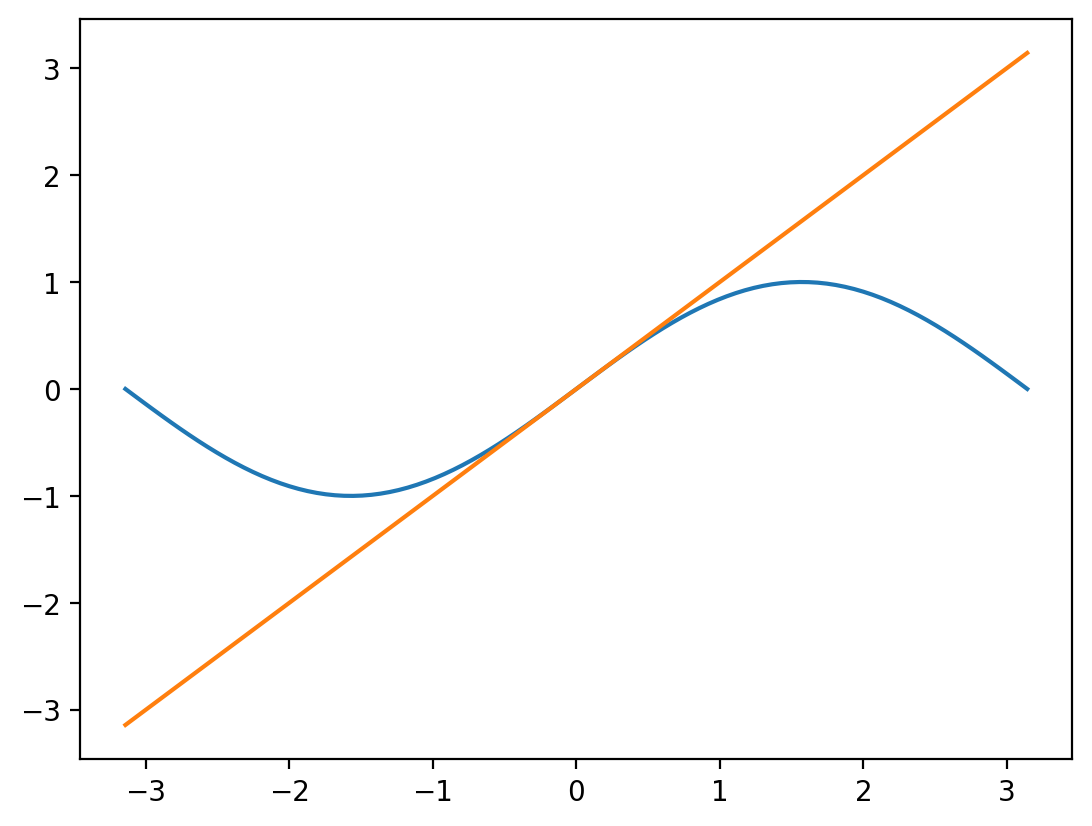

In [6]:
# Plot the Taylor approximation

plt.plot(x, f(x), label='f(x)')
plt.plot(x, taylor1(f, x), label='Taylor approximation')


In [15]:
# factorial function in JAX

def factorial(n):
    return jnp.prod(jnp.arange(1, n + 1))

In [16]:
# Find the nth order Taylor approximation for f(x) at x = 0

def taylor(f, x, n, x0=0.):
    grads = {0:f}
    output = f(x0)
    for i in range(1, n+1):
        grads[i] = grad(grads[i-1])
        output += grads[i](x0) * (x - x0)**i / factorial(i)
    return output

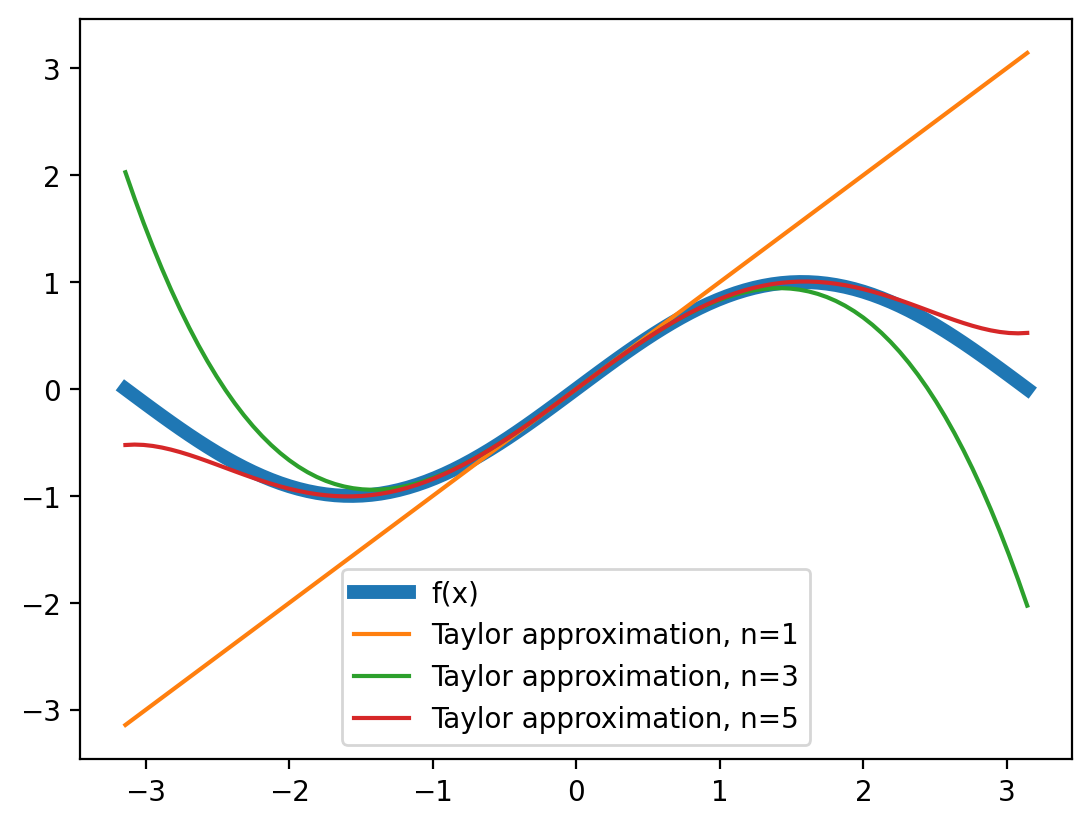

In [30]:
plt.plot(x, f(x), label='f(x)', lw=5)
plt.plot(x, taylor(f, x, 1), label='Taylor approximation, n=1')
plt.plot(x, taylor(f, x, 3), label='Taylor approximation, n=3')
plt.plot(x, taylor(f, x, 5), label='Taylor approximation, n=5')
plt.legend()

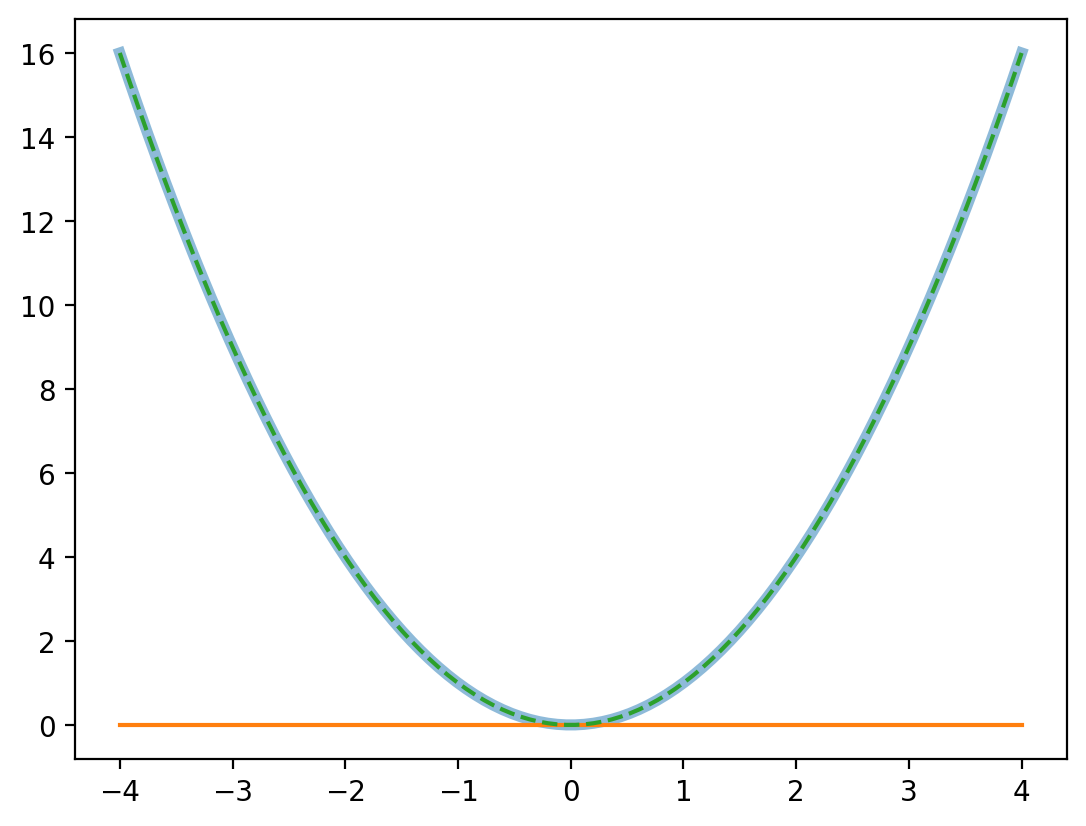

In [43]:
x = jnp.linspace(-4, 4, 100)

def g(x):
    return x**2

plt.plot(x, g(x), label='g(x)', lw=4, alpha=0.5)
plt.plot(x, taylor(g, x, 1), label='Taylor approximation, n=1')
plt.plot(x, taylor(g, x, 2), label='Taylor approximation, n=3', ls='--')

(-2.0, 20.0)

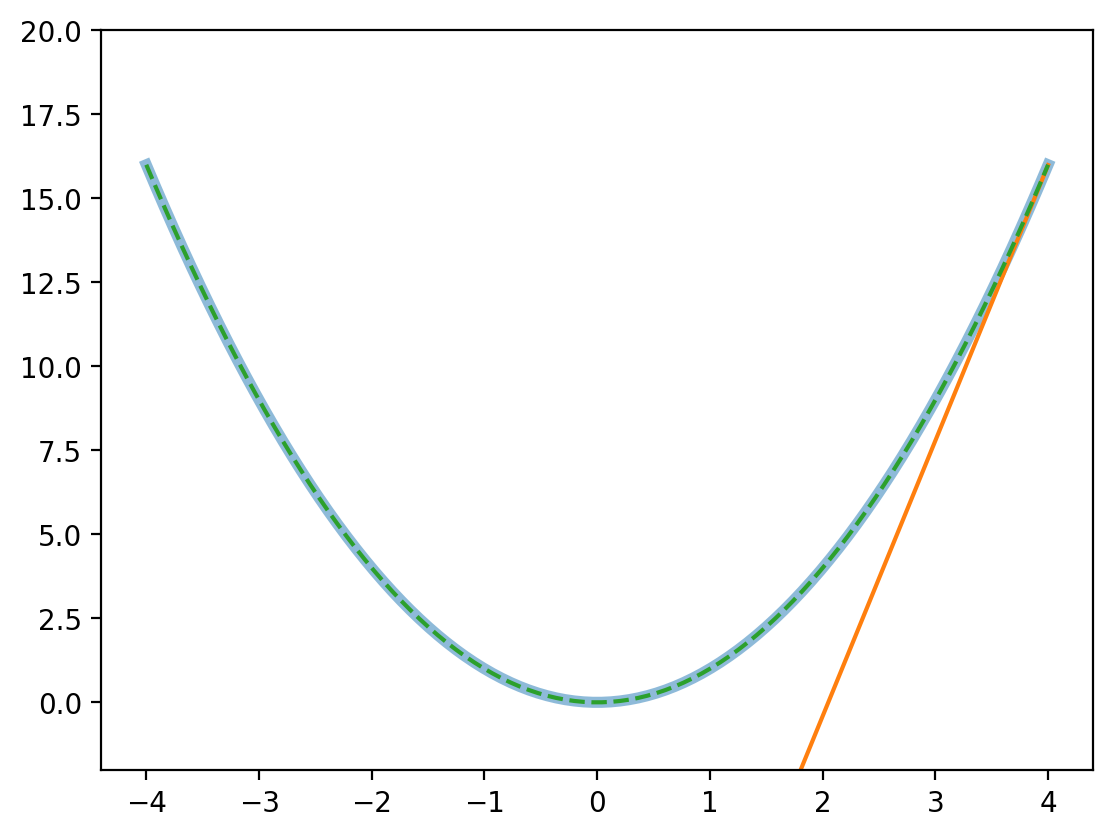

In [44]:
plt.plot(x, g(x), label='g(x)', lw=4, alpha=0.5)
plt.plot(x, taylor(g, x, 1, 4.1), label='Taylor approximation, n=1')
plt.plot(x, taylor(g, x, 2, 4.1), label='Taylor approximation, n=3', ls='--')
plt.ylim((-2, 20))